# Spatial unmasking in the cocktail party nightmare :
<brk>
## Thejasvi Beleyur, December 2017

## This notebook will deal with how we quantify the call-echo masking a bat may be experiencing based on the angular separation of the target echo and the masker call. Using data from an experimental study we will build a conceptual framework and follow it up with code that implements this logic

In [1]:
import datetime
print ('this notebook was last exported/run on', datetime.datetime.now().strftime('%Y-%m-%d_%H-%M'))

('this notebook was last exported/run on', '2017-12-18_19-25')


### We know that the human and bat (& other animals?) auditory system has a hard time separating out two temporally overlapping sounds if one of them is louder than the other, and especially if the two sounds arrive from the same direction. This means that the softer sound is not heard, and is called masking. The same situation occurs when a bat is trying to echolocate in the presence of conspecifics. The echoes that return may not be heard, which means the bat may not be able to detect objects in its vicinity. 

### However, if the masker and the target sound arrive from different directions, auditory systems are able to tell apart the two sounds using cues from the time of arrival differences between the two ears, or the intensity differences too perhaps [REF]. This means that as the angle of arrival between the target and the masker increases the auditory system is better able to tell apart sounds that are temporally overlapping [Human REFS]. This capability means that bats are potentially able to echolocate and perceive echoes even in situations where there are many overlaps between an echo and another incoming sound. This modelling exercise will try to quantify how much the echolocation of a bat is benefitted by the presence of these auditory-cognitive mechanisms.

### There are two dimensions along which overlapping sounds can arrive in, time and space. Temporally, an echo-masker pair can cause masking in three configurations:
#### 1) Forward masking: the masker arrives ahead of the echo
#### 2) Simultaneous masking: the masker and the echo arrive overlap completely in time 
#### 3) Backward masking: the echo arrives ahead of the masker

### In general with temporal masking, the closer the echo-masker are in time, the more masking occurs, which means a higher intensity is required for the echo to be heard at the same masker intensity. Additionally, though not shown in bats, it is known in humans that forward masking occurs at longer target-masker arrival delays than backward masking. The real occurence of backward masking itself is disputed [audio handbook ref, Yost textbook ref]. eg. forward masking in humans can occur over timescales of $\Delta_{time\ of\ arrival} <= 75-100$ milliseconds, while backward masking occurs only with $\Delta_{time\ of\ arrival} < 50$ milliseconds.

### Spatially, the echo and masker can arrive with the same angle of arrival with $\theta_{separation} = 0$ or with a difference in the angle of arrivals: $\theta_{separation} > 0$. It is known from studies in multiple species [REFS] that as the $\theta_{separation}$ between temporally overlapping target and masker increases, the threshold for hearing the target actually drops. This is called 'spatial unmasking', and means that when bats are flying in the presence of other echolocators, and the $\theta_{separation}$ of echo and conspecific masking call is beyond a certain $\theta_{separation}$, then it may possible present no problem to the bat.




# Echo-masker configurations : 

## Since we have three kinds of temporal masking and two kinds of $\theta_{separation}$ ( 0 and >0), we get 6 overall kinds of echo-masker combinations:

### *The table and diagram below correspond to each other in their positions*



In [2]:
from IPython.display import HTML, display
import tabulate # thanks ruffsl goo.gl/WnMRoY
table = [[ '1) $\\theta_{separation} = 0$ + Forward masking','2) $\\theta_{separation} >0$ + Forward masking'],
[ '3) $\\theta_{separation} = 0$ + Simultaneous masking',  '4) $\\theta_{separation} >0$ + Simultaneous masking'],
['5) $\\theta_{separation} = 0$ + Backward masking','6) $\\theta_{separation} >0$ + Backward masking']]
display(HTML(tabulate.tabulate(table,tablefmt='html')))

1) $\theta_{separation} = 0$ + Forward masking,2) $\theta_{separation} >0$ + Forward masking
3) $\theta_{separation} = 0$ + Simultaneous masking,4) $\theta_{separation} >0$ + Simultaneous masking
5) $\theta_{separation} = 0$ + Backward masking,6) $\theta_{separation} >0$ + Backward masking


!['foward masking and SUM'](img/masking_types.jpg)
### Though there are these 6 possible kinds of echo-masker configurations - we still have a set of parameters undefined :
### 1) Relative intensities of echo and masker 
### 2) Time ranges over which forward/backward masking occur
### 3) $\theta_{separation}$ at which spatial unmasking begins to occur


# A  Quick Literature Survey : 
## There are a bunch of studies which have either actively investigated masking, or where masking occurs as part of the study design. I looked into the bat psychoacoustics literature to get some estimates of the above parameters in each case, presented here as a table.

## Here it is important to note that when I use the terms 'forward' or 'backward' masking I also include situations where there is echo+masker overlap. For eg. when a masker arrived before an echo, and then overlaps it also - I still refer to this as 'forward' masking. Typically, one would refer to forward/backward masking when there is no overlap at all. 

In [3]:
table_wrefs = [[ '1) $\\theta_{separation} = 0 + Forward\ masking$ : Miller 1991, Ruihong et al. 2003,\
                chp 36 Siewert et al. Echolocation in Dolphins and Bats',
'2) $\\theta_{separation} >0$ + $Forward\ masking$: ????'],              
[ '3) $\\theta_{separation} = 0$ + $Simultaneous\ masking$:  Troest & Mohl 1986',
 '4) $\\theta_{separation} >0$ + $Simultaneous\ masking$: Warnecke et al. 2014, $\\theta_{separation}$ = $90^{\circ}$'],
['5) $\\theta_{separation} = 0$ + $Backward\ masking$: Suemer et al. 2009,Mohl and Surlykke 1989',
 '6) $\\theta_{separation} >0$ + $Backward\ masking$: Suemer et al. 2009, $\\theta_{separation}$: $0- 23^{\circ}$']]
display(HTML(tabulate.tabulate(table_wrefs,tablefmt='html')))

"1) $\theta_{separation} = 0 + Forward\ masking$ : Miller 1991, Ruihong et al. 2003, chp 36 Siewert et al. Echolocation in Dolphins and Bats",2) $\theta_{separation} >0$ + $Forward\ masking$: ????
3) $\theta_{separation} = 0$ + $Simultaneous\ masking$: Troest & Mohl 1986,"4) $\theta_{separation} >0$ + $Simultaneous\ masking$: Warnecke et al. 2014, $\theta_{separation}$ = $90^{\circ}$"
"5) $\theta_{separation} = 0$ + $Backward\ masking$: Suemer et al. 2009,Mohl and Surlykke 1989","6) $\theta_{separation} >0$ + $Backward\ masking$: Suemer et al. 2009, $\theta_{separation}$: $0- 23^{\circ}$"


## Following this broad summary of the studies with various parameters, let us now take a look at the range of values reported in the studies:

## 1) *$\theta_{separation}=0 + Forward\ masking$ : *

### > [$Miller\ 1991$](https://link.springer.com/article/10.1007/BF00215079) : studied how ultrasonic clicking of moths may affect prey/object ranging in echolocating bats. Ultrasonic clicks were played back when triggered by the bat's calls and were timed to arrive within a particular time delay of a phantom echo. Bats were trained to distinguish between two echoes, a 'near' and 'far' phantom echoes - and had to indicate the echo type on playback. The clicks and echoes were presented from the same speaker.

### When clicks arrived within 1.5 milliseconds of the phantom echo, the bats could not distinguish between the 'far' and the 'near' echo types properly. This *may* indicate some kind of masking that occured at these echo-click delays. 

### Caveats to consider: potential clutter echoes (see Moss & Schnitzler 1995, 'Clutter echoes',chp.3, Hearing in Bats), as the speaker was placed close to the bat with reference to the bat call duration. The thresholds reported in the study may be on the conservative side.


### Echo level : 68 dB peSPL re 20$\mu$Pa
### Masker (click) level: 64 dB peSPL (calculated).
### Masking time range : <=1.5 milliseconds. 
### $\Delta$  target-masker dB SPL :  68 - 64 = 4 dB 

### Study species : *Eptesicus fuscus*


### >  [$Ruihong\ et\ al.\ 2003$](https://link.springer.com/article/10.1360/02wc0570) : studied how neurons in the Inferior Colliculus (IC) respond to the presence of a loud sound that preced the target sound. This is somewhat analogous to forward masking in psychoacoustics. The masker and the target were sinusoids of the best frequency of the probed neuron. When the time gap between the 'masker' and the 'target' sound increased beyond 3 milliseconds, the response of the IC neurons increased. When the masker and target were close in time, there was a 'suppression' in neuronal activity seen. The masker was presented at 10,20 & 30 dB above the minimum threshold, and the time gaps between the masker and target were also varied between 1,3,6,9 and 12 milliseconds.

### Caveats to consider: This study was done on anesthetised bats, and playbacks were done monaurally. It may also be difficult to interpret the IC neuron response in terms of what the bat may actually experience perceptually? The 'target' sound was also a single frequency tone, rather than a echolocation-like call.


### Target sound level: varying - depends on the neuronal unit being measured
### Masker level: 10,20 & 30 dB above the minimum threshold level
### Masking time range : <= 3 milliseconds. 
### Study species: *Eptesicus fuscus*
### $\Delta$  target-masker dB SPL :  -10, -20, -30 dB, depending on the playback level

### > [$Siewert\ et\ al.\ 2004\, (chapter\ 36)$](http://press.uchicago.edu/ucp/books/book/chicago/E/bo3612864.html): Bats were trained to fly towards a speaker playing back a test signal. The test signal was a *Megaderma lyra* multiharmonic approach call. The test signal was played back in the presence of broadband noise with decreasing power from 10-100 KHz. In Experiment 2, the delay between the end of the broadband noise and start of the test signal was varied between 24 to -6 ms. The noise pulse was 40 milliseconds long. The same hearing thresholds as reached under no noise conditions might have been reached at 30-40 milliseconds (extrapolated number). *'In our experiment, the detection thresholds increased by about 6 dB per delay half reduction'.*

### Target sound level: (graphical estimates, with dB rounded off to closest integer value) 
|Masker-echo delay (milliseconds)| Echo level (dB SPL)|
|-|-|
|3| 28|
|6| 22|
|12|16|
|24|11|
### Masker sound level: 45 dB SPL 
### Masking time range: tested for upto 24 ms
### $\Delta$  target-masker dB SPL:
|Masker-echo delay (milliseconds)| $\Delta$ dB SPL echo to noise (dB)|
|-|-|
|3| -17|
|6| -23|
|12|-29|
|24|-34|


### Study species: *Megaderma lyra*

### Caveats to consider: ?




## 2) *$\theta_{separation}>0 + Forward\ masking$ : *

## *As of now, have not been able to find relevant papers* 



## 3) *$\theta_{separation} = 0$ + $Simultaneous\ masking$*

### >[$Troest\ and\ Mohl\ 1986$](https://link.springer.com/article/10.1007%2FBF00604175?LI=true): Bats were trained to tell if there was a phantom echo present or not by moving to one side of a two choice setup. Noise and phantom echoes were played from a single speaker. The noise was a broadband white noise with power spectral density of $-113\ dB\ re\ 1\ \frac{Pa}{\sqrt{Hz}}$, and the phantom echo was a replicate of the bat call. 



### Target phantom echo level: without noise: 40-48 dB peSPL re 20$\mu$Pa , *with noise* : 47-58 dB peSPL, $\Delta$ increase of 7-10 dB peSPL in the presence of noise.
### Masker sound level: 55 dB pe SPL  (calculated)
### Masking time range: NOT VALID, simultaneous masking
### Study species: *Eptesicus serotinus*

### Caveats to consider: Clutter echoes from speaker (see Moss & Schnitzler 1995, 'Clutter echoes' chp.3 Hearing in Bats). This might mean that the thresholds obtained from this study are actually conservative estimates.
### $\Delta$  target-masker dB SPL :  47-58 - 55 = -8 to +3  dB 



### >[$Mohl\ and\ Surlykke\ 1989$](https://link.springer.com/article/10.1007%2FBF00613805?LI=true): Bats were trained to tell if there was a phantom echo present or not in the presence of a noise signal that varied in delay. Simultaneous to backward masking situations were investigated. 
### For simultaneous masking experiments the noise was broadband with $-5\ dB\ \frac{SPL}{\sqrt(Hz)}$ with durations of 2-37.5 milliseconds.
### Simulatenous masking was also tested at the the zero delay of the backward masking experiments, a broadband noise with $16\ dB\ \frac{SPL}{\sqrt(Hz)}$ power spectral density was used of 5 milliseconds.

### *simultaneous masking experiment results:*
### Target phantom echo level: without noise:37-38 dB SPL re 20$\mu$Pa , *with noise* : (adding 15 dB) 52-53 dB peSPL, $\Delta$ increase of 15 dB  in the presence of noise.
### Masker sound level: *to be calculated*


### *zero delay of backward masking experiment results:*
### Target phantom echo level: without noise:37-38 dB SPL re 20$\mu$Pa , *with noise* : (adding ~35 dB) 72-73 dB peSPL, $\Delta$ increase of 35 dB  in the presence of noise (graphical estimate).
### Masker sound level: *to be calculated*


### Masking time range: NOT VALID, simultaneous masking
### Study species: *Eptesicus serotinus*

### Caveats to consider: The speaker was placed relatively close to the bat for the call durations of 1.7-2.4 milliseconds, there could have been a contribution of clutter echo from the speaker.  (see Moss & Schnitzler 1995, 'Clutter echoes' chp.3 Hearing in Bats). This might mean that the thresholds obtained from this study are actually conservative estimates.

### > [$Siewert\ et\ al.\ 2004\, (chapter\ 36)$](http://press.uchicago.edu/ucp/books/book/chicago/E/bo3612864.html): See 1) for experiment description. There was a complete overlap of test signal and noise at the -6 millisconds delay between noise and test signal, the experiment looked at simultaneous masking. 



### *-6 milliseconds delay of forward masking experiment results:*
### Target phantom echo level: without noise (for 2ms test signal) : 6.7 dB SPL re 20$\mu$Pa , *with noise* :36 dB SPL(graphical estimate),
### $\Delta$ increase of 29.3 dB  in the presence of noise .
### Masker sound level: 45 dB SPL
### $\Delta$  target-masker dB SPL : 36 - 45 = -9  dB 

### Caveats to consider: It is not stated explicitly if the target-echo-noise playbacks were done coupled to the call emission of the bats. If the playbacks were not coupled to the call emission of the bat, then the levels here indicate lower levels than bats may require in an echolocation-coupled playback because of additional forward masking due to the call emission. (see figure 36.1 of the paper)








## 4) *$\theta_{separation} >0$ + $Simultaneous\ masking$*

### >[$Warnecke\ et\ al.\ 2014$](http://asa.scitation.org/doi/abs/10.1121/1.4869483): Bats were trained to detect a target echo sound played from either a left or right speaker set at a fixed angle at 0 azimuth. Two speakers at 90 degrees elevation were used to play back clutter echoes that would simultaneously mask the target echo. All combination of paired clutter-echo speaker playbacks were carried out, and no effect was seen in any of the treatments. 



### Target phantom echo level:  ???? dB peSPL re 20$\mu$Pa
### Masker level: ??
### Masking time range: NOT VALID, simultaneous masking
### $\theta_{separation}:  >=90^{\circ}$ vertical separation
### Study species: *Eptesicus fuscus*



## 5) $\theta_{separation} = 0$ + $Backward\ masking$

### >[$Mohl\ and\ Surlykke\ 1989$](https://link.springer.com/article/10.1007%2FBF00613805?LI=true): For experiment description see above in 3). In backward masking experiments, the noise was broadband noise with power spectral density of $16\ dB\ \frac{SPL}{\sqrt(Hz)}$ of 5 millisecond duration. When the noise followed the phantom echo beyond 2 milliseconds the bats showed similar hearing thresholds as the reference silence.



### Target phantom echo level:  ???? dB peSPL re 20$\mu$Pa
### Masker sound level: *to be calculated*
### Masking time range: < 2 milliseconds
### Study species: *Eptesicus fuscus*


### >[$ Sümer\ et\ al.\ 2009$](https://link.springer.com/article/10.1007/s00359-009-0424-9): Bats were trained to identify if a target echo (from a thin wire) was present in the presence of a masking echo ( big flat plate) which arrived soon after the target echo. The intensity of the target echo was varied by changing the diameter of the wire and the delay of the masker echo was varied by changing its distance behind the target wire. All thresholds reported here are for the 75% correct criterion. 


### Caveats to consider: the target strength measurements reported were estimated with a downward sweep playback. Most speaker constructions have a limited directionality, and this means a bat may perceive much higher echo levels as they can ensonify greater volumes than speakers even at high frequencies. 

### Target echo level: (calculated) 1.2mm wire had target strength of -36.8 at 1m distance. 
####  For source levels of 97.9-105.2 dB peSPL (10cm), this is 77.9-85.2 dB peSPL (1m) , and the echo levels are then:
###  41.1-68.4 dB peSPL
### Masker sound level: 
#### (calculated) target echo level + 22.3 dB, which is then in the range of
### 63.4-90.7 dB peSPL
### Masking time range: < 0.65 milliseconds
### Study species: *Eptesicus fuscus*
### $\Delta$  target-masker dB SPL :  -22.3 dB 



## 6) $\theta_{separation} >0$ + Backward masking

### >[$ Sümer\ et\ al.\ 2009$](https://link.springer.com/article/10.1007/s00359-009-0424-9): See 5) above for experimental details. Keeping the target echo's direction the same, the masking echo's angle of arrival was altered by moving the flat plate at different angles with the radial distance 11cm behind the target echo. This kept the masker echo at the 75% detection delay distance (at $0^{\circ}$ angle). If spatial unmasking is present, it is expected that bats will be able to detect progressively softer echoes as the angle between the masker and the echo increases. This was implemented by changing the diameter of the target wire.


### Target echo level: (calculated) 61.1-68.4 dB peSPL.
#### Calculation : 1.2mm wire had target strength of -36.8 at 1m distance. For source levels of 97.9-105.2 dB peSPL (10cm), this is 77.9-85.2 dB peSPL (1m). The echo levels are thus the source levels at 1m - target strength.
### Masker sound level: (calculated) 83.4-90.7 dB peSPL.
#### Calculation: the flat plate had a target strength 22.3 dB greated than the target wire. Thus, the the target echo level + 22.3 dB, which is then in the range of  63.4 to 90.7 ( 61.1+22.3 - 68.4+22.3) dB peSPL
### Masking time range: < 0.65 milliseconds
### Masking angle range : < $22.3^{\circ}$. The echo level dropped to no masker leves beyond 22.3$^{\circ}$

### Study species: *Eptesicus fuscus*
### $\Delta$  target-masker dB SPL : worst is  -22.3 down to -64 dB  




# Putting it all together:
## The studies above provide an important starting point in trying to quantify how much spatial unmasking contributes to the alleviation of the cocktail party nightmare. In general here are some of the overall patterns that I can put together :
* ## *Bats are able to listen to target echoes even when they are at least -8 dB fainter than the masking sound*:
  ### The range of $\Delta dB\ SPL$ between the target echo and the masker sound lies in the range of -22.3 to -8 dB when the sounds are in the same direction. This is a *very* large difference if one considers that on a linear scale, this means the echo was 7 - 40 % of the maskers level. 

  ### This means that, even in the absence of exact $\Delta dB\ SPL$ values for situations where the echo and masker arrive from different directions , if the value is above -8 dB, the bat could hear it. This is a conservative estimate, because the co-localised situation is the toughest for bat echo perception, as it does not provide additional inter-aural cues such as time of arrival or level differences.
  
  ### *This is a conservative estimate, as it takes the highest required echo-masker level difference of the numbers from all   studies. *

* ## *Forward masking in bats could occur for upto a few milliseconds *:
  ### Siewert et al. 2004 have shown that the effect of forward masking because of noise has an effect over much longer durations than anticipated before. During simultaneous masking *M. lyra* is able to hear target echoes at $\Delta$ dB SPLs  of -9, and when the time gap between noise and target echo increases to 3 milliseconds, this drops down to  $\Delta$ dB SPLs  of  -17, and continues to drop as time gap increases. This time range is also supported by the results of  Ruihong et al. 2003 from the Inferior Colliculus neuronal suppression recordings. 
  
 ### The results from Miller 1991 remains an exception from this pattern however, as the bats seem to require  <br>a   $\Delta$ dB SPL of +4. However, Miller 1991 did not directly test the perception of echoes in the temporal vicinity of a masker, but rather the bats' ability to tell apart echoes at two different distances. Perhaps this difference in tasks could cause a difference in the required intensity levels.


* ## *Backward masking in bats could occur $<=$2 milliseconds*: 
### Sümer et al. 2009 suggest backward masking occurs at <=0.65 milliseconds, while Mohl & Surlykke 1989 suggest backward masking over <= 2 milliseconds. I would suggest the value from Sümer et al. 2009, since they used 'real' targets, which were placed far enough from the bat to avoid potentially interfering clutter echoes. 

* ## *Bats can unmask backward maskers that arrive beyond $\theta_{separation}=23^\circ$ completely*:
    ###  Bats can hear echoes in the presence of maskers without any required rise in level if the $\theta_{separation} >=23^\circ$.<br> This trend is during backward masking, and perhaps may be similar in forward masking too ? 

* ## *The bat auditory system follows 'typical' temporal masking patterns*:  
  ### Forward masking appears to occur over longer time durations than backward masking. This means that bats are more affected be a masker that arrives before an echo, than a masker that arrives *after* an echo. For example, the period of forward masking from the literature is ~3milliseconds, and the period of backward masking is 0.65-2 milliseconds. For the temporal range of backward masking, I would argue that 0.65 milliseconds from the Sümer et al. 2009 study is perhaps closer to a bats' capabilities, as there is no extra speaker-clutter echo which may have caused additional masking. 
  
  ### To quote [Yost 2006](http://www.brill.com/fundamentals-hearing-introduction-0) *'...the amount of backward masking declines more quickly than does the amount of forward masking as a function of increasing the temporal separation between the signal and the masker'*


# Putting it all together : a graph of $\Delta $dB levels across different time delays :


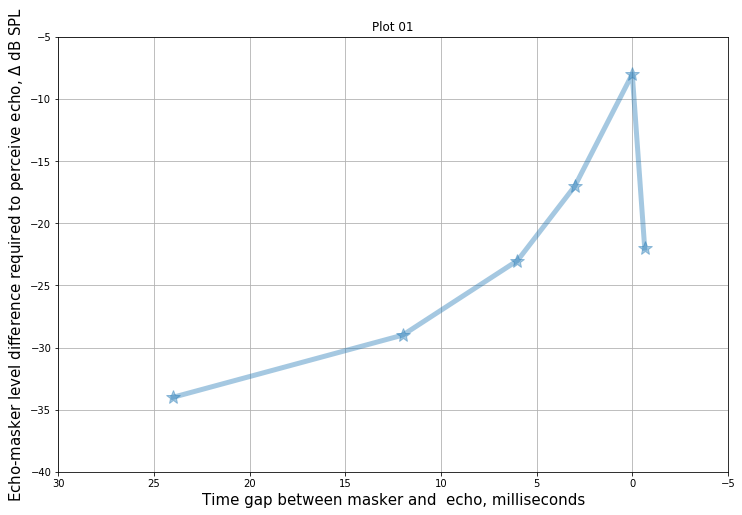

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from scipy.stats import linregress 
masking_dataset = pd.DataFrame()
masking_dataset['timegap_ms'] = np.array([-0.65,0,3,6,12,24])
masking_dataset['dB_leveldiff'] = np.array([-22,-8,-17,-23,-29,-34])
fig,ax = plt.subplots(ncols=1, nrows=1, figsize=(12,8))
plt.plot(masking_dataset['timegap_ms'],masking_dataset['dB_leveldiff'],'*-',linewidth=5,alpha=0.4,markersize=15);
plt.xlim(30,-5);plt.grid(); plt.ylim(-40,-5);plt.grid()
plt.xlabel('Time gap between masker and  echo, milliseconds',fontsize=15);plt.title('Plot 01')
plt.ylabel('Echo-masker level difference required to perceive echo, $\Delta$ dB SPL',fontsize=15);
ax.grid(b=True);plt.show()

# Modelling masking release:
### Sümer et al. 2009 showed that as angular separation increases bats can actually perceive progressively softer echoes in the presence of a fixed masker level. They showed that bats were able to listen to sounds that were 28 dB *less* than the co-localised echo-masker level. This is called a masking release of 28 dB. 

### While Sümer et al. 2009 have dealt with spatial unmasking with a backward masker, there are no experiments yet conducted, to my knowledge, of spatial unmasking with a forward masker. This means I will need to model this separately. 

### First let us see the consequences of spatial unmasking in the backward masking case. Remember the backward masker in the Sümer et al. study always arrives at a constant delay of 0.65 milliseconds after the start of the echo. The plot from the paper is below :
![suemeretalfig4b](img/fig4B_Suermeretal.PNG)
### We will extract the data from the plot, and try to fit a polynomial onto it

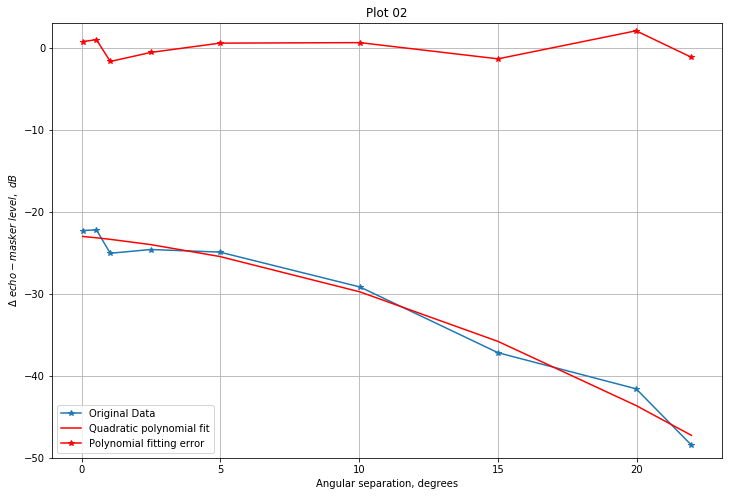

In [5]:
fig4b = pd.read_csv('data/Suemer_et_al_2009_fig4b.csv')
fig4b['deltaTS_thickwire'] = fig4b['target_strength'] - fig4b['target_strength'][0] # the different in target strength from 
# the original 1.2 mm wire 

fig4b['delta_level'] = fig4b['deltaTS_thickwire'] - 22.3

f,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,8))
plt.plot(fig4b['masker_angle'],fig4b['delta_level'],'*-',label='Original Data')

#calculate polynomial fit
P= np.polyfit(fig4b['masker_angle'],fig4b['delta_level'],2)
ts_pred = np.polyval(P,fig4b['masker_angle'])
fit_error = fig4b['delta_level']-ts_pred
plt.plot(fig4b['masker_angle'],ts_pred,'r',label='Quadratic polynomial fit')
plt.plot(fig4b['masker_angle'],fit_error,'*-r',label='Polynomial fitting error') # are within +/- 3 dB

plt.legend();ax.grid();plt.xlabel('Angular separation, degrees');plt.ylabel('$\Delta\ echo-masker\ level,\ dB$')
plt.ylim(-50,3);plt.title('Plot 02')
plt.show()



## set the values as separate columns
fig4b['quad_fit'] = ts_pred
fig4b['quad_release'] = ts_pred-ts_pred[0]

## Let us now try to formulate the unmasking data in terms of 'release' due to angular separation. For now, let us assume that the same amount of release is obtained in the presence of a forward and backward masker. 

## It is important to note here that we *are* making an important assumption here that the spatial release is the same irrespective of which echo arrival angle we consider. This may differ in reality, as the bats hearing is not equally good at all angles. Even if we do not assume this, the presumption that the angle of arrival does not matter would still continue to hold over a range of angles in the frontal direction [HRTF refs here]

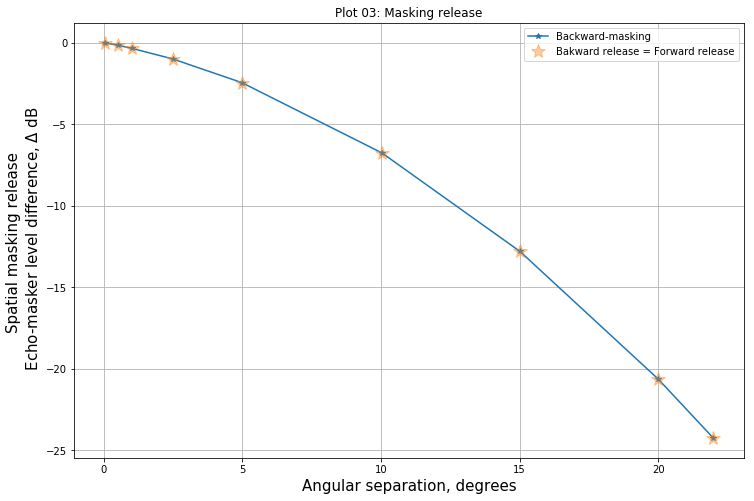

In [6]:

f,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,8))
ax.plot(fig4b['masker_angle'],fig4b['quad_release'],'*-',label='Backward-masking')
ax.plot(fig4b['masker_angle'],fig4b['quad_release'],'*',markersize=15,alpha=0.4,label='Bakward release = Forward release')
plt.title('Plot 03: Masking release')

plt.ylabel('Spatial masking release \n Echo-masker level difference, $\Delta$ dB',fontsize=15);
plt.xlabel('Angular separation, degrees',fontsize=15);plt.legend();ax.grid()
plt.show()

# create a new interpolated set of spatial release vs angular separation values:
theta_sep = np.linspace(0,23,50)
deltaecholevel = np.polyval(P,theta_sep)
deltaecholevel += -deltaecholevel[0]

spatial_release_fn = pd.DataFrame(index =range(deltaecholevel.size),columns=['deltatheta','dB_release'])
spatial_release_fn['deltatheta'] = theta_sep
spatial_release_fn['dB_release'] = deltaecholevel
#plt.figure(2)
#plt.plot(theta_sep,deltaecholevel) ;plt.show()

## Let us also interpolate and create a continuous function out of the $\Delta$ echo-masker levels plot 01, so that we can now decide if the echo-masker level difference is sufficient for arbitrary time delays. 


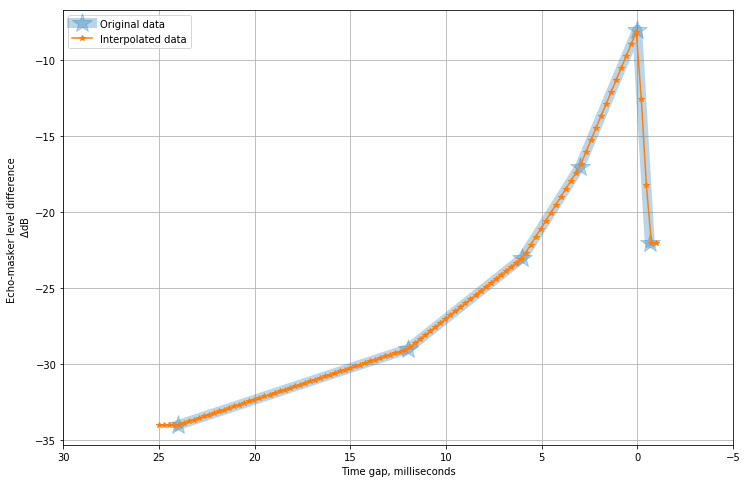

In [7]:
new_timegaps = np.linspace(25,-1,100)
interp_dBleveldiff = np.interp(new_timegaps,masking_dataset['timegap_ms'],masking_dataset['dB_leveldiff'])

f,axs = plt.subplots(nrows=1,ncols=1,figsize=(12,8))
plt.plot(masking_dataset['timegap_ms'],masking_dataset['dB_leveldiff'],'*-',linewidth=10,alpha=0.3,markersize=20,
        label='Original data')
plt.plot(new_timegaps,interp_dBleveldiff,'*-',label='Interpolated data')
plt.xlim(30,-5);plt.ylabel('Echo-masker level difference \n $\Delta$dB ')
plt.xlabel('Time gap, milliseconds');plt.legend();axs.grid()
plt.show()

colloc_data_interp = pd.DataFrame()
colloc_data_interp['timegap_ms'] = new_timegaps
colloc_data_interp['dB_leveldiff'] = interp_dBleveldiff


## With the help of this graph above, we can now come up with a criterion to decide if masking has occured or not. 

* ## 1)  We first see the time-gap between echo and masker, get the expected co-localised $\Delta$ dB levels between the echo and masker
* ## 2) We then look at the angular separation to calculate the expected $\Delta$ dB levels with spatial release included temporal and angular separation included.
* ## 3) If the $\Delta$ dB level is lower than the expected, than the bat does not hear the echo in the presence of a masker. If the $\Delta$ dB level is higher than this calculated value - then the bat hears it. 

## For example, let's say that there is an echo at 50 dB SPL coming from 30 degrees to the right, and there is a call that has arrived with the following properties : 
* ### Call level : 80 dB SPL
* ### Angle of arrival : 26 degrees to the right
* ### Temporal location: masker ends 10.2 milliseconds before the echoes beginning 

## This is how we can estimate whether the echo is heard or not:

* ## 1) First we look up the collocalised level difference which the bat can tolerate

In [8]:
# describe the call by a dictionary of its properties
echo = {'level':50,'arrival':0,'angle':30}
call = {'level':80,'arrival':10.2,'angle':26}

# get the collocalised level difference that the bat could have heard at 10.2 ms separation 
leveldiff_indx = np.argmin( np.abs(call['arrival']-colloc_data_interp['timegap_ms']))
leveldiff_min = colloc_data_interp['dB_leveldiff'][leveldiff_indx]
print('The bat can tolerate %0.02f dB level difference when echo-masker are collocalised at %0.02f milliseconds'
      %(leveldiff_min,call['arrival']))

The bat can tolerate -27.29 dB level difference when echo-masker are collocalised at 10.20 milliseconds


* ## 2) Now we look at the spatial release from masking the bat may achieve due to the angular separation:

In [9]:
angle_sep = np.abs(echo['angle']-call['angle'])
release_dB = np.polyval(P,0) - np.polyval(P,angle_sep)
print('The release from masking is %0.02f dB'%release_dB)
print('This means, the bat can theoretically perceive an echo with : %0.02f dB level difference' %(leveldiff_min-release_dB) )


The release from masking is 1.83 dB
This means, the bat can theoretically perceive an echo with : -29.13 dB level difference


* ## 3) Now, let's look at the echo-masker level difference we have at hand : <brk> $\Delta level\ difference= 50-80 = -30 dB $

### Since the echo-masker level difference of $-30 < -29\ \Delta dB\ $we decide that the echo is masked
### We can thus use this decision logic to check if any calls in the vicinity of an echo would cause masking. 


# *What about informational masking?* :  
## None of the analyses so far have considered the case where there are a few calls that are not loud enough to mask an echo effectively, but they could still affect the perception of the echo. This is called informational masking and has not been investigated experimentally in bat echolocation to the best of my knowledge. 

## In the absence of experimental data, one can hypothesize both ways: 
* #### a) Bats are very  capable of dealing with acoustic scenes filled with irrelevant sounds of varying spectral properties - for example when flying in a dense forest filled with many strong reflectors. As they are adept at 'filtering' out a few relevant echoes in the presence of many many clutter echoes, bats are unlikely to be affected by multiple calls and echoes if they do not cause temporal masking of any kind. 

* #### b) While bats may be good at detecting target echoes in the midst of many other echoes, these are always coupled to their own call emission. While flying solitarily, perhaps this 'filtering' algorithm works well - but in the presence of conspecific calls, the bat auditory-cognitive system may have issues as the calls arrive unpredictably, in contrast to ec

# How much does spatial unmasking alleviate the 'cocktail party nightmare' ?
## In another notebook I have explored the extent to which 'sonar glimpsing' in the cocktail party may allow bats to listen in the gaps. With basic monte-carlo simulations, I showed that a bat has a high probability of hearing at least one of multiple echoes every pulse interval - even in the midst of many masking conspecific calls. In this simulation I had investigated the most pessimistic case where all conspecific calls cause unrecoverable temporal masking. Here we shall investigate what happens when we include the capabilities of the bat auditory system through spatial unmasking. 

## Let us model the case where a group of *N* bats are echolocating on the wing as they emerge from a cave. These *N* bats are calling at ~100dB SPL (at 1meter) and are spaced at anywhere between 0.5-1 meter apart [[Zheng et al. 2010]](dcommon.bu.edu/bitstream/handle/2144/3803/2010-027-3d-bat-trajectories.pdf?sequence=1&isAllowed=y). This means that the received level of every conspecific call is  anywhere between 106-100 dB SPL. The bats were also seen to be spaced uniformly in azimuth, which means that the angle of arrival of the conspecific call could be anywhere between 0-360$^\circ$.

## We will also assume that there are 3 target echoes that a bat is trying to listen to, which are coming from a frontal cone of 30$^\circ$ width.


!['echo_call_separation'](img/angular_separation_echo_call.png)
## To quantify the intensity at which bats will perceive the echoes returning from their conspecifics we need the target strength of a bat. There are two estimates used in the published literature : from  [Goetze et al. 2016](https://www.nature.com/articles/srep30978) of -30dB  to  -10 dB [Giuggioli et al. 2015](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1004089). My own unpublished data suggest a range of -43 to -33 dB at 1meter for *Myotis myotis* bats.

## Both references do not explicitly state the distance at which the target strength was measured/estimated at. Given the high value of -10 dB of Giuggioli et al. 2015, it might be safe to say that it could have been measured at 10cm.

## This variation in target strength values is understandable as there could be a wide variation in the target strength of a conspecific based on the orientation, wing beat position and species of the bat being ensonified. 

### We shall thus take target strengths of conspecifics to lie between -40 and -30 dB  thus the range of echoes will lie anywhere between (ignoring atmospheric attenuation) : 

## Based on the sonar equation :  $RL = SL - 2TL + TS$, where TS ranges between -40 to -30
## Softest echo from nearest bat at 1meter with lowest TS = <br>$100 - 2\times20log_{10}(\frac{1}{1}) -40 = 60\ dB\ SPL$
## Loudest echo from nearest bat at 0.5 meter with higher TS= <br>$100 - 2\times20log_{10}(\frac{0.5}{1})-30 = 82\ dB\ SPL$
### Even if we calculate the expected range from the TS of Giuggioli et al. 2015 of -10dB at 10cm , we still obtain echo levels within the range we just obtained:
### Loudest echo from nearest bat 0.5 m with $-10\ dB_{10cm}$ TS, (here the source level is 120 dB SPL as the target strength is also calculated to 10cm): <br>$120 - 2\times20log_{10}(\frac{0.5}{0.1})-10 = 82\ dB\ SPL$
### Softest echo from further away bat 1 m with $-10\ dB_{10cm}$ TS : <br>$120 - 2\times20log_{10}(\frac{1}{0.1})-10 = 70\ dB\ SPL$


## So, the min-max range of the received echoes vary from 60-82 dB SPL, for bats with $Source\ Level_{1m} = $ 100 dB SPL

## In combination with this, let us also remember that the received levels of conspecific masker calls will be between 100 to 106 dB SPL.

# Now let us run some simulations to see the effect of the spatial unmasking in the cocktail party nightmare in comparison to a bat that has no spatial unmasking. 

11.3910000324


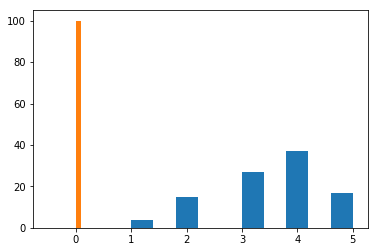

In [10]:
from the_cocktail_party_nightmare_MC import *

temporal_masking_fn = colloc_data_interp.copy()

def run_one_trial(call_density,spatial_unmasking=True,**kwargs):
    '''
    Runs one trial with/out spatial unmasking.
    
    **kwargs
        temp_mk_fn : temporal masking function
        sp_rel_fn : spatial release function
        
    '''
    num_echoes = 5 
    call_level_range = (100,106)
    echo_level_range = (60,82)
    echo_arrival_angles = (75,105) # treating 0 degrees as 3'oclock 
    call_arrival_angles = (0,360)
    
    timeresolution = 10**-4
    pulse_interval = 0.1
    call_durn = 3*10**-3
    pi_timesteps = np.arange(0,int(pulse_interval/timeresolution))
    
    call_steps = int(call_durn/timeresolution)
    
    
    calls = populate_sounds(pi_timesteps,call_steps,call_level_range,call_arrival_angles,call_density)
    # re-assign the echo start and stop points to avoid echo-echo overlap and keep them at the beggining 1.2 
    # of the pulse interval
    echoes = populate_sounds(pi_timesteps,call_steps,echo_level_range,echo_arrival_angles,num_echoes)
    echo_starts = np.int16(np.linspace(0,pulse_interval/2.0,5)/timeresolution)
    echo_ends = echo_starts + call_steps -1
    echoes['start'] = echo_starts
    echoes['stop'] = echo_ends
    
    
    
    if spatial_unmasking:
        
        num_echoesheard = calculate_num_heardechoes(echoes,calls,kwargs['temp_mk_fn'],kwargs['sp_rel_fn'])
    else :
        # with NO spatial release
        spl_rel_fn = kwargs['sp_rel_fn'].copy()
        spl_rel_fn.iloc[:,1] = 0
        
        num_echoesheard = calculate_num_heardechoes(echoes,calls,kwargs['temp_mk_fn'],spl_rel_fn)
    
    return(num_echoesheard)
    
import time
start = time.time()
w_sum = [ run_one_trial(10,True,temp_mk_fn=temporal_masking_fn,sp_rel_fn=spatial_release_fn) for k in range(100)]
wo_sum = [ run_one_trial(10,False,temp_mk_fn=temporal_masking_fn,sp_rel_fn=spatial_release_fn) for k in range(100)]
print(time.time()-start)
np.median(w_sum), np.median(wo_sum)
plt.hist(w_sum);plt.hist(wo_sum);plt.show()



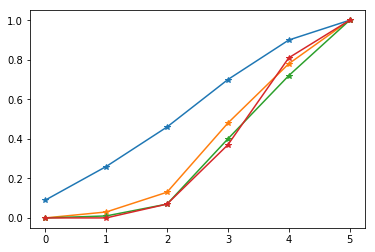

In [25]:
call_ds = np.array([1,10,20,50])
p_leq3 = []
for i,calldens in enumerate(call_ds):
    w_sum = [ run_one_trial(calldens,True,temp_mk_fn=temporal_masking_fn,sp_rel_fn=spatial_release_fn) for k in range(100)]
    probs,cum_probs = calc_pechoesheard(w_sum,5)
    p_leq3.append(cum_probs[3])
    plt.plot(cum_probs,'*-')
plt.show()



In [28]:
%load_ext line_profiler
%lprun -f run_one_trial run_one_trial(50,True,temp_mk_fn=temporal_masking_fn,sp_rel_fn=spatial_release_fn)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [ ]:
%timeit run_one_trial(10,True,temp_mk_fn=temporal_masking_fn,sp_rel_fn=spatial_release_fn)

In [21]:
a,b = calc_pechoesheard(wo_sum,5)
a

array([ 1.,  0.,  0.,  0.,  0.,  0.])